In [1]:
DATASET_PATH = '/home/miaortizma/work/datanfs/mmimdb'
!ls {DATASET_PATH} -al

total 2252
drwxr-xr-x  4 miaortizma miaortizma      81 Jun  8 14:11 .
drwxrwxrwx 17 root       root          4096 Jun 12 06:52 ..
drwxr-xr-x  2 miaortizma miaortizma 1269760 Jun  9 14:41 dataset
drwxr-xr-x  2 miaortizma miaortizma      43 Jun  8 14:11 .ipynb_checkpoints
-rw-r--r--  1 miaortizma miaortizma  493283 Nov 11  2016 split.json


0162024
dict_keys(['music department', 'camera and electrical department', 'distributors', 'rating', 'runtimes', 'costume designer', 'make up', 'year', 'production design', 'miscellaneous crew', 'production companies', 'color info', 'plot', 'votes', 'producer', 'title', 'mpaa', 'assistant director', 'writer', 'long imdb canonical title', 'languages', 'production manager', 'editor', 'certificates', 'costume department', 'long imdb title', 'country codes', 'language codes', 'cover url', 'editorial department', 'genres', 'director', 'miscellaneous companies', 'cinematographer', 'art direction', 'akas', 'sound crew', 'location management', 'kind', 'art department', 'countries', 'plot outline', 'full-size cover url', 'canonical title', 'cast', 'smart long imdb canonical title', 'original music', 'smart canonical title'])


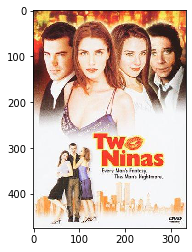

When two beautiful women fall for the unluckiest guy in the world his life takes on delicious complications.
['When two beautiful women fall for the unluckiest guy in the world his life takes on delicious complications.']
['Romance', 'Comedy']


In [2]:
import json
from PIL import Image
from IPython.display import display # to display images
import matplotlib.pyplot as plt


with open(DATASET_PATH+'/split.json') as f:
    split = json.load(f)

train =  split['train']
split['val'] = split['dev']
val = split['dev']
test = split['test']



with open(DATASET_PATH+'/dataset/{}.json'.format(val[0])) as f:
    dev_0 = json.load(f)
#for key in train_0.keys():
    #print(key)
    
print(val[0])
img_path = DATASET_PATH+'/dataset/{}.jpeg'.format(val[0])
img = Image.open(img_path).convert('RGB')
image = plt.imread(img_path)
print(dev_0.keys())
plt.imshow(image)
plt.show()
print(dev_0['plot outline'])
print(dev_0['plot'])
print(dev_0['genres'])

In [9]:
DATASET_GENRES = [
        "Crime",
        "Drama",
        "Thriller",
        "Action",
        "Comedy",
        "Romance",
        "Documentary",
        "Short",
        "Mystery",
        "History",
        "Family",
        "Adventure",
        "Fantasy",
        "Sci-Fi",
        "Western",
        "Horror",
        "Sport",
        "War",
        "Music",
        "Musical",
        "Animation",
        "Biography",
        "Film-Noir",
      ]

In [10]:
def generate_jsonl(partition='train'):
    counts = {}
    for genre in DATASET_GENRES:
        counts[genre] = 0
    with open(DATASET_PATH + '/dataset/{}.jsonl'.format(partition), 'w') as f:
        for fid in split[partition]:
            with open(DATASET_PATH+'/dataset/{}.json'.format(fid)) as jsonf:
                try:
                    train_i_raw = json.load(jsonf)
                    if 'plot' in train_i_raw.keys():
                        train_i_raw['plot outline'] = train_i_raw['plot'][0]
                    genres = train_i_raw['genres']
                    genres = [genre for genre in genres if genre in DATASET_GENRES]
                    if len(genres) == 0:
                        continue

                    for genre in genres:
                        counts[genre] += 1
                    train_i_filtered = { "text": train_i_raw['plot outline'], "label": genres, "img": '{}.jpeg'.format(fid)}
                    if fid == '0097498':
                        print(train_i_filtered)

                    jsons = json.dumps(train_i_filtered)
                    f.write(jsons)
                    f.write('\n')
                except:
                    print(fid)
                    print(train_i_raw.keys())
    print(counts)

In [11]:
generate_jsonl()

{'Crime': 2293, 'Drama': 8424, 'Thriller': 3113, 'Action': 2155, 'Comedy': 5108, 'Romance': 3226, 'Documentary': 1234, 'Short': 281, 'Mystery': 1231, 'History': 680, 'Family': 978, 'Adventure': 1611, 'Fantasy': 1162, 'Sci-Fi': 1212, 'Western': 423, 'Horror': 1603, 'Sport': 379, 'War': 806, 'Music': 634, 'Musical': 503, 'Animation': 586, 'Biography': 788, 'Film-Noir': 202}


In [20]:
import numpy as np

data_path = DATASET_PATH + '/dataset/train.jsonl'
data = [json.loads(l) for l in open(data_path)]
text_lens = np.array([len(row['text'].split()) for row in data])

In [21]:
print(text_lens.mean())

85.85982510288066


In [16]:
generate_jsonl('val')

{'Crime': 382, 'Drama': 1401, 'Thriller': 512, 'Action': 351, 'Comedy': 873, 'Romance': 548, 'Documentary': 219, 'Short': 48, 'Mystery': 209, 'History': 118, 'Family': 172, 'Adventure': 278, 'Fantasy': 186, 'Sci-Fi': 193, 'Western': 72, 'Horror': 275, 'Sport': 64, 'War': 128, 'Music': 100, 'Musical': 85, 'Animation': 105, 'Biography': 144, 'Film-Noir': 34}


In [25]:
generate_jsonl('test')

{'text': "A motorcycle gang kidnaps a young woman, Josie, from a diner and brutally kills her. Many years later, the girl's father finds a magic crystal that can bring the life back to dead objects. He uses it to re-animate his daughter. He lets her seduce any young man that comes to visit the small town and then kills them. Four young students, two boys and two girls spend a vacation near the town, Hellgate. They hear about the story and get involved.", 'label': ['Horror'], 'img': '0097498.jpeg'}
{'Crime': 1163, 'Drama': 4142, 'Thriller': 1567, 'Action': 1044, 'Comedy': 2611, 'Romance': 1590, 'Documentary': 629, 'Short': 142, 'Mystery': 617, 'History': 345, 'Family': 518, 'Adventure': 821, 'Fantasy': 585, 'Sci-Fi': 586, 'Western': 210, 'Horror': 825, 'Sport': 191, 'War': 401, 'Music': 311, 'Musical': 253, 'Animation': 306, 'Biography': 411, 'Film-Noir': 102}


The counts are the same of the original paper so everything is A-OKAY

In [50]:
!mv '/home/miaortizma/work/datanfs/home/miaortizma/0097498.jpg' {DATASET_PATH+'/dataset'}

In [51]:
!ls

assign-mmimdb.ipynb  create-jsonl.ipynb   rm818098176.jpg
checkpoints	     preprocessing.ipynb


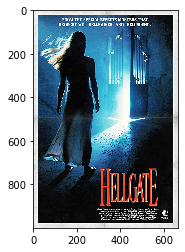

In [22]:
from PIL import Image

image = plt.imread(DATASET_PATH + '/dataset/0097498.jpg')
plt.imshow(image)
plt.show()